<a href="https://colab.research.google.com/github/ayydannm/MachineLearning/blob/main/Ensamble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import numpy as np

def majority_heads_biased(n,p=0.51):
  successes=0
  for i in range(n):
    if np.random.random()>1-p:
      successes+=1
  return successes>500

print(majority_heads_biased(1000))

True


In [ ]:
from scipy.stats import binom,norm
import math

def majority_heads_binom(n,p=0.51):
  majority=math.ceil(n/2)
  return sum(binom.pmf(k,n,p) for k in range(majority,n+1))

print(majority_heads_binom(1000)) #Boyuk ededler qanunu ucun

0.7467502275563255


In [ ]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X,y=make_moons(n_samples=500,noise=0.30,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

voting_clf=VotingClassifier(
    estimators=[
        ('lr',LogisticRegression(random_state=42)),
        ('rf',RandomForestClassifier(random_state=42)),
        ('svc',SVC(random_state=42,probability=True))
    ]
)

voting_clf.fit(X_train,y_train)
voting_clf.score(X_test,y_test)

0.912

In [ ]:
voting_clf.estimators

[('lr', LogisticRegression(random_state=42)),
 ('rf', RandomForestClassifier(random_state=42)),
 ('svc', SVC(probability=True, random_state=42))]

In [ ]:
for name,clf in voting_clf.named_estimators_.items():
  print(name,clf.score(X_test,y_test))

lr 0.864
rf 0.896
svc 0.896


In [ ]:
voting_clf.predict(X_test[:1])

array([1])

In [ ]:
[estimator.predict(X_test[:1]) for estimator in voting_clf.estimators_]

[array([1]), array([1]), array([0])]

In [ ]:
voting_clf.voting="soft"
voting_clf.score(X_test,y_test)

0.92

#Bagging and Pasting

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,
                          max_samples=100,bootstrap=True,n_jobs=-1)

bag_clf.fit(X_train,y_train)
bag_clf.score(X_test,y_test)

0.92

In [ ]:
tree_clf=DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
tree_clf.score(X_test,y_test)

0.872

#OOB evaluation-> Out of bag evalution

In [ ]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,
                          bootstrap=True,n_jobs=-1,oob_score=True)

bag_clf.fit(X_train,y_train)
bag_clf.score(X_test,y_test)

0.888

In [ ]:
bag_clf.oob_score_

0.8986666666666666

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,
                              n_jobs=-1,random_state=42)

rnd_clf.fit(X_train,y_train)
rnd_clf.score(X_test,y_test)

0.912

In [ ]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(max_features="sqrt",
                                                 max_leaf_nodes=16,
                                                 splitter='best'),n_estimators=500,random_state=42)

bag_clf.fit(X_train,y_train)
bag_clf.score(X_test,y_test)

0.912

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ext_clf=ExtraTreesClassifier(n_estimators=500,max_leaf_nodes=16,
                              n_jobs=-1,random_state=42)
ext_clf.fit(X_train,y_train)
ext_clf.score(X_test,y_test)

0.912

#Feature Importance

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
rnd_clf=RandomForestClassifier(n_estimators=500,n_jobs=-1,random_state=42)
rnd_clf.fit(iris["data"],iris["target"])

for name,score in zip(iris["feature_names"],rnd_clf.feature_importances_):
  print(name,score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


#Boosting

#AdaBoosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                           n_estimators=200,
                           learning_rate=0.5,random_state=42)

ada_clf.fit(X_train,y_train)
ada_clf.score(X_test,y_test)

0.896

#Gradient Boosting

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X=np.random.rand(100,1)-0.5
y=3*X[:,0]**2+0.05*np.random.randn(100) #y=3x**2 +guassion noise

tree_reg1=DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
tree_reg2=DecisionTreeRegressor(max_depth=2,random_state=42)
y2=y-tree_reg1.predict(X)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
tree_reg3=DecisionTreeRegressor(max_depth=2,random_state=42)
y3=y2-tree_reg1.predict(X)
tree_reg2.fit(X,y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt=GradientBoostingRegressor(max_depth=2,n_estimators=3,
                               learning_rate=1.0,random_state=42)

gbrt.fit(X,y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [ ]:
gbrt_best=GradientBoostingRegressor(
    max_depth=2,learning_rate=0.05,n_estimators=500,
    n_iter_no_change=10,random_state=42
)

gbrt_best.fit(X,y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

In [ ]:
gbrt_best.n_estimators_

92

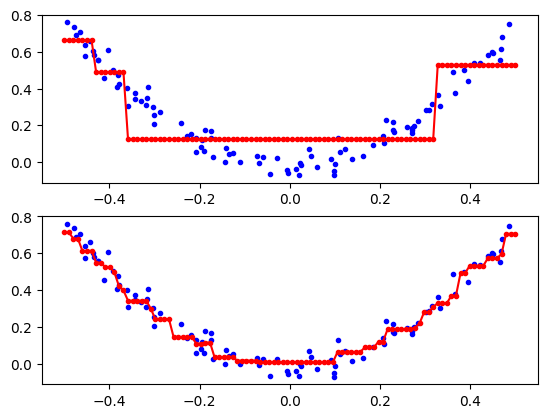

In [ ]:
import matplotlib.pyplot as plt
tree_reg=DecisionTreeRegressor(max_depth=2,random_state=42)
X_new=np.linspace(-0.5,0.5,100).reshape(-1,1)
tree_reg.fit(X,y)

plt.subplot(211)
plt.plot(X,y,"b.")
plt.plot(X_new,tree_reg.predict(X_new),"r.-")

plt.subplot(212)
plt.plot(X,y,"b.")
plt.plot(X_new,gbrt_best.predict(X_new),"r.-")
plt.show()

#Extra Gradient Boosting

In [ ]:
from xgboost import XGBRegressor

xbg_reg=XGBRegressor(random_state=42)
xbg_reg.fit(X,y)
xbg_reg.score(X,y)

0.9998913626632905

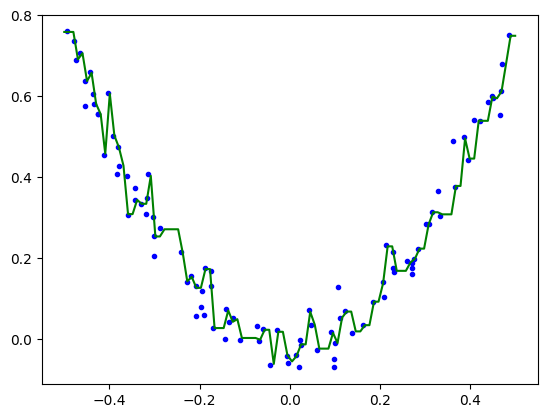

In [ ]:
plt.plot(X,y,"b.")
plt.plot(X_new,xbg_reg.predict(X_new),"g-",label='Boosted');

#Categorical Boosting

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor,Pool
catboost=CatBoostRegressor(iterations=20,learning_rate=1,depth=2)
catboost.fit(X,y)
catboost.score(X,y)

0:	learn: 0.1561849	total: 47.1ms	remaining: 895ms
1:	learn: 0.1193095	total: 47.9ms	remaining: 431ms
2:	learn: 0.1068532	total: 48ms	remaining: 272ms
3:	learn: 0.0919921	total: 48ms	remaining: 192ms
4:	learn: 0.0868724	total: 48.1ms	remaining: 144ms
5:	learn: 0.0838125	total: 48.2ms	remaining: 112ms
6:	learn: 0.0807786	total: 48.3ms	remaining: 89.6ms
7:	learn: 0.0741797	total: 48.3ms	remaining: 72.5ms
8:	learn: 0.0684957	total: 48.4ms	remaining: 59.1ms
9:	learn: 0.0622976	total: 48.5ms	remaining: 48.5ms
10:	learn: 0.0602450	total: 48.5ms	remaining: 39.7ms
11:	learn: 0.0583680	total: 48.6ms	remaining: 32.4ms
12:	learn: 0.0572640	total: 48.7ms	remaining: 26.2ms
13:	learn: 0.0565491	total: 48.7ms	remaining: 20.9ms
14:	learn: 0.0531044	total: 48.8ms	remaining: 16.3ms
15:	learn: 0.0509416	total: 48.9ms	remaining: 12.2ms
16:	learn: 0.0484136	total: 48.9ms	remaining: 8.63ms
17:	learn: 0.0476465	total: 49ms	remaining: 5.44ms
18:	learn: 0.0472589	total: 49.1ms	remaining: 2.58ms
19:	learn: 0.04

np.float64(0.9613627738851215)

In [ ]:
from lightgbm import LGBMRegressor

lgbm=LGBMRegressor(max_depth=5,random_state=42)
lgbm.fit(X,y)
lgbm.score(X,y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 35
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 1
[LightGBM] [Info] Start training from score 0.265458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


0.8285984586781898

#Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

stack_clf=StackingClassifier(
    estimators=[
        ('lr',LogisticRegression(random_state=42)),
        ('rf',RandomForestClassifier(random_state=42)),
        ('svc',SVC(random_state=42,probability=True))
    ],
  final_estimator=RandomForestClassifier(random_state=43)
)

stack_clf.fit(X_train,y_train)
stack_clf.score(X_test,y_test)

0.928